# Working with Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
book = pd.read_csv('Books.csv')          #Read Books.csv and convert it to a pandas dataframe

In [3]:
book.head(5)                             #Check first 5 rows of the dataframe

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9.780000e+12,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9.780000e+12,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9.780000e+12,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9.780000e+12,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9.780000e+12,eng,435,2149872,33964


In [4]:
book.tail(5)                  #Check last 5 rows of the dataframe

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
2979,47604,Sieben Tage Hexerei (Die Welt des Chrestomanci...,Diana Wynne Jones,3.92,3551552150,9.780000e+12,ger,272,17,1
2980,47648,Abhorsen: La novena puerta (The Abhorsen Trilo...,Garth Nix,4.27,8478715088,9.790000e+12,spa,315,13,2
2981,47660,Rebeca,Daphne du Maurier,4.22,840146272X,9.790000e+12,spa,544,67,8
2982,47668,Ensayo sobre la ceguera,José Saramago,4.11,9707311150,9.790000e+12,spa,329,10296,686
2983,47692,American Gods,Neil Gaiman,4.11,1594970998,9.780000e+12,spa,477,58,6


In [5]:
book.describe()               #Check basic statistics for all the numerical columns in the data

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,2984.000000,2984.000000,2.984000e+03,2984.000000,2.984000e+03,2984.000000
mean,10368.521113,3.949082,9.765510e+12,356.523458,3.014165e+04,781.101542
std,13105.129611,0.337586,3.865607e+11,246.403824,1.799118e+05,3351.413228
min,1.000000,0.000000,2.004913e+10,0.000000,0.000000e+00,0.000000
25%,2168.750000,3.780000,9.780000e+12,198.000000,3.300000e+01,3.000000
50%,4690.000000,3.960000,9.780000e+12,304.000000,3.085000e+02,24.000000
75%,12941.250000,4.150000,9.780000e+12,450.000000,3.625000e+03,199.250000
max,47692.000000,5.000000,9.790000e+12,3342.000000,5.629932e+06,70390.000000


In [6]:
book.isnull().sum()        #Check if there are any null values in the data

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
# num_pages           0
ratings_count         0
text_reviews_count    0
dtype: int64

In [7]:
book['language_code'].unique()              #Check all the unique entries in language_code column

array(['eng', 'en-US', 'spa', 'fre', 'en-GB', 'ger', 'por', 'jpn', 'ita',
       'lat', 'rus', 'tur', 'swe'], dtype=object)

In [ ]:
#Replace all language code with en-US and en-GB to eng

In [8]:
book['language_code'] = book['language_code'].replace(['en-US', 'en-GB'], ['eng', 'eng'])          

In [9]:
book['language_code'].unique()              #Check if all en-US and en-GB have been have been replaced by eng

array(['eng', 'spa', 'fre', 'ger', 'por', 'jpn', 'ita', 'lat', 'rus',
       'tur', 'swe'], dtype=object)

In [10]:
book.pivot_table(index = 'language_code', values = ['average_rating', 'ratings_count'], 
                 aggfunc = {'average_rating':'mean', 'ratings_count':'sum'})

,average_rating,ratings_count
language_code,,
eng,3.944077,87449469
fre,3.984354,565321
ger,3.908109,110392
ita,3.737368,26064
jpn,4.264531,3998
lat,4.346667,329
por,3.944444,4914
rus,4.201429,9909
spa,3.935060,1758510


In [11]:
book = book[book['text_reviews_count']>20]     #Keep only those book records where number of text reviews are more than 20

In [12]:
book['text_reviews_count'].min()        #check if there is any record with review count less than 20

21

In [13]:
language = list(book['language_code'].unique())

In [14]:
language

['eng', 'fre', 'spa', 'jpn', 'ger', 'ita', 'por', 'lat', 'rus', 'swe', 'tur']

In [15]:
lcount = []
for lang in language:
    lcount.append(list(book[book['language_code'] == lang][['language_code']].count()))

In [16]:
lcount        #Note that lcount is list of lists

[[1362], [42], [102], [1], [16], [4], [4], [1], [1], [3], [1]]

In [17]:
lang_count = []
for l in range(0, len(lcount)):
    lang_count.append(lcount[l][0])

In [18]:
lang_count        #Now lang_count is a normal list

[1362, 42, 102, 1, 16, 4, 4, 1, 1, 3, 1]

In [19]:
plt.style.use("seaborn-notebook")     #Set a style for figures

Text(0,0.5,'Count')

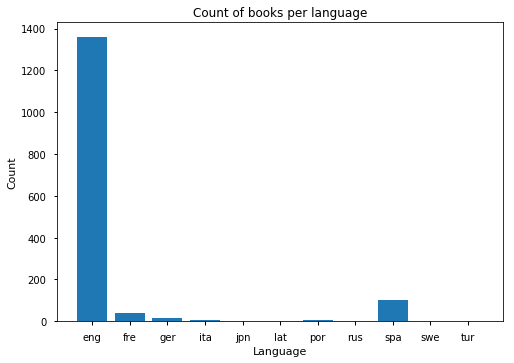

In [20]:
plt.bar(language, lang_count)
plt.title('Count of books per language')
plt.xlabel('Language')
plt.ylabel('Count')

Text(0.5,1,'Number of books per language')

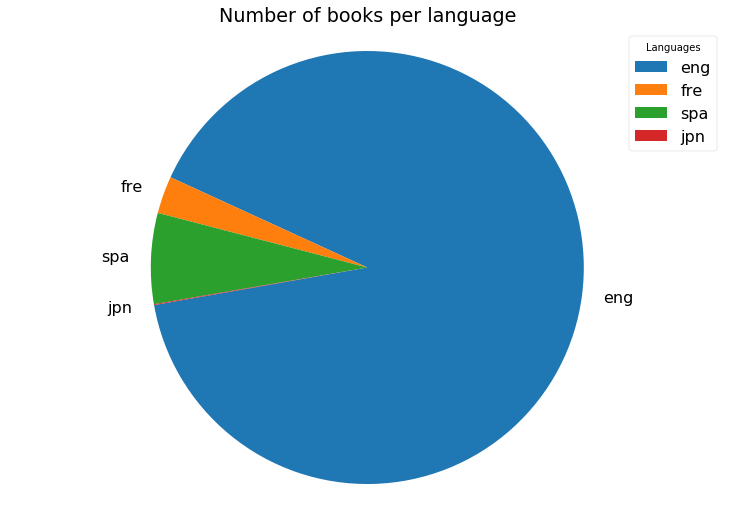

In [21]:
plt.style.use("seaborn-poster") 
plt.pie(lang_count[:4], labels = language[:4], startangle=190)
plt.legend(title = 'Languages', loc = 'best')
plt.axis('equal')
plt.title('Number of books per language')

Text(0,0.5,'Frequency')

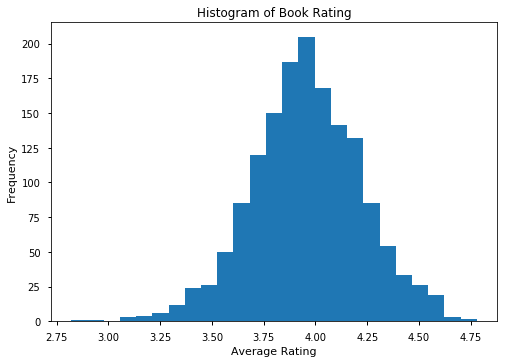

In [22]:
plt.style.use("seaborn-notebook") 
plt.hist(book['average_rating'], bins = 25)
plt.title('Histogram of Book Rating')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Number of Pages in the Book')

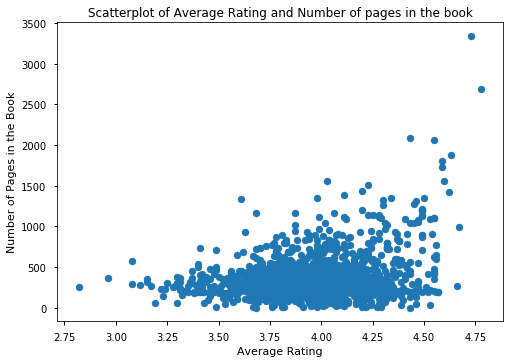

In [23]:
plt.scatter(x = book['average_rating'], y = book['# num_pages'], s = 50)
plt.title('Scatterplot of Average Rating and Number of pages in the book')
plt.xlabel('Average Rating')
plt.ylabel('Number of Pages in the Book')

Text(0.5,0,'Rating')

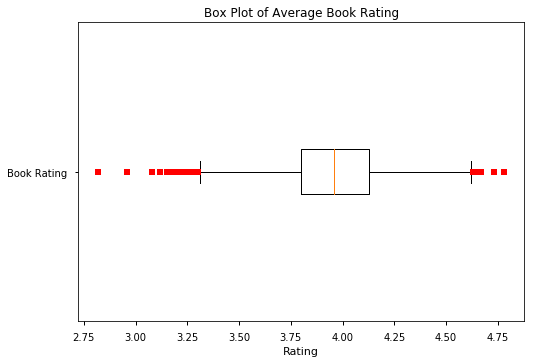

In [24]:
plt.style.use("seaborn-notebook")
plt.boxplot(book['average_rating'], labels = ['Book Rating'], sym = 'rs', vert = False)  #vert = False makes box plot horizontal
plt.title('Box Plot of Average Book Rating')
plt.xlabel('Rating')                                                    